# Mental Health Risk Detection

## Cleaning and Inspecting Original Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("aai-590-capstone-mental-health/data-assets/Mental Health Dataset.csv")
df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
print("\nShape: ", df.shape)
print("\nColumns:")
for col in df.columns:
    print(f" - {col}")

print("\nData Types:\n", df.dtypes)


Shape:  (292364, 17)

Columns:
 - Timestamp
 - Gender
 - Country
 - Occupation
 - self_employed
 - family_history
 - treatment
 - Days_Indoors
 - Growing_Stress
 - Changes_Habits
 - Mental_Health_History
 - Mood_Swings
 - Coping_Struggles
 - Work_Interest
 - Social_Weakness
 - mental_health_interview
 - care_options

Data Types:
 Timestamp                  object
Gender                     object
Country                    object
Occupation                 object
self_employed              object
family_history             object
treatment                  object
Days_Indoors               object
Growing_Stress             object
Changes_Habits             object
Mental_Health_History      object
Mood_Swings                object
Coping_Struggles           object
Work_Interest              object
Social_Weakness            object
mental_health_interview    object
care_options               object
dtype: object


In [4]:
print("Missing values per column:")
print(df.isnull().sum())

print("\nDuplicates:", df.duplicated().sum())

Missing values per column:
Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

Duplicates: 2313


In [5]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], errors='coerce')

# All columns except Timestamp to category
cat_cols = [col for col in df.columns if col != 'Timestamp']
df[cat_cols] = df[cat_cols].astype('category')

print("\nData Types after conversion:\n", df.dtypes)


Data Types after conversion:
 Timestamp                  datetime64[ns]
Gender                           category
Country                          category
Occupation                       category
self_employed                    category
family_history                   category
treatment                        category
Days_Indoors                     category
Growing_Stress                   category
Changes_Habits                   category
Mental_Health_History            category
Mood_Swings                      category
Coping_Struggles                 category
Work_Interest                    category
Social_Weakness                  category
mental_health_interview          category
care_options                     category
dtype: object


In [6]:
# Remove duplicates
df = df.drop_duplicates()

# Remove NaN values
df = df.dropna()

print("\n Shape after cleaning: ", df.shape)
print("\nMissing values after cleaning:")
print(df.isnull().sum())


 Shape after cleaning:  (284858, 17)

Missing values after cleaning:
Timestamp                  0
Gender                     0
Country                    0
Occupation                 0
self_employed              0
family_history             0
treatment                  0
Days_Indoors               0
Growing_Stress             0
Changes_Habits             0
Mental_Health_History      0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
mental_health_interview    0
care_options               0
dtype: int64


In [7]:
df.describe(include='all')

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858,284858
unique,NaN,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,NaN,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,NaN,234000,165869,64728,255711,172357,143331,61994,97540,106844,101474,98592,150318,103136,100746,227036,115233
mean,2014-09-09 11:47:30.245174784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2014-08-27 11:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2014-08-27 14:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2014-08-28 03:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2014-08-28 23:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2016-02-01 23:04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Print the df to verify all cleaning steps
print("\nCleaned DataFrame:")
df.head()


Cleaned DataFrame:


,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
3,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
5,2014-08-27 11:49:00,Female,Poland,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Not sure
6,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
7,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No


## Exploratory Data Analysis

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns


=== Gender ===


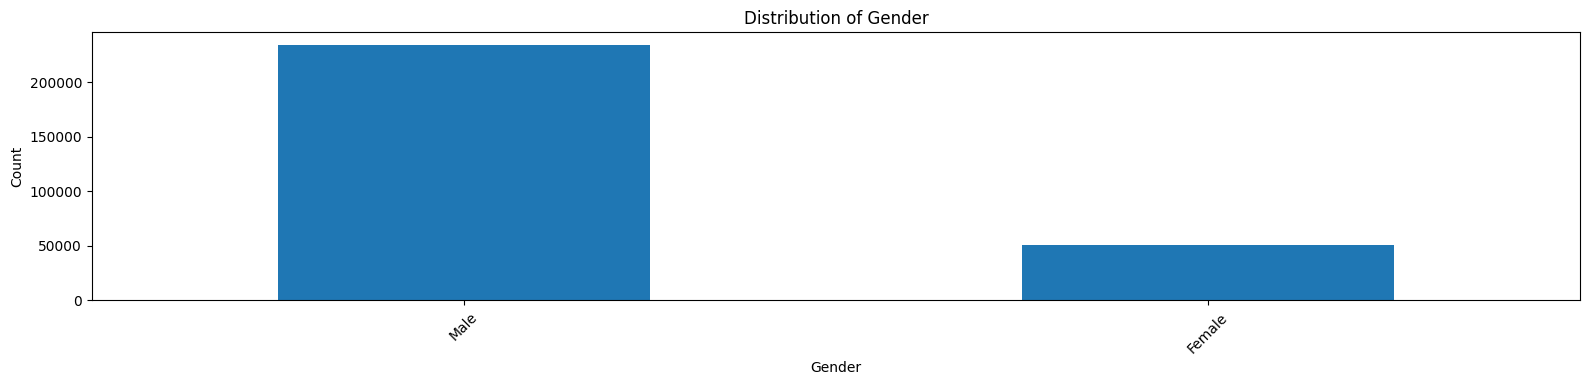


=== Country ===


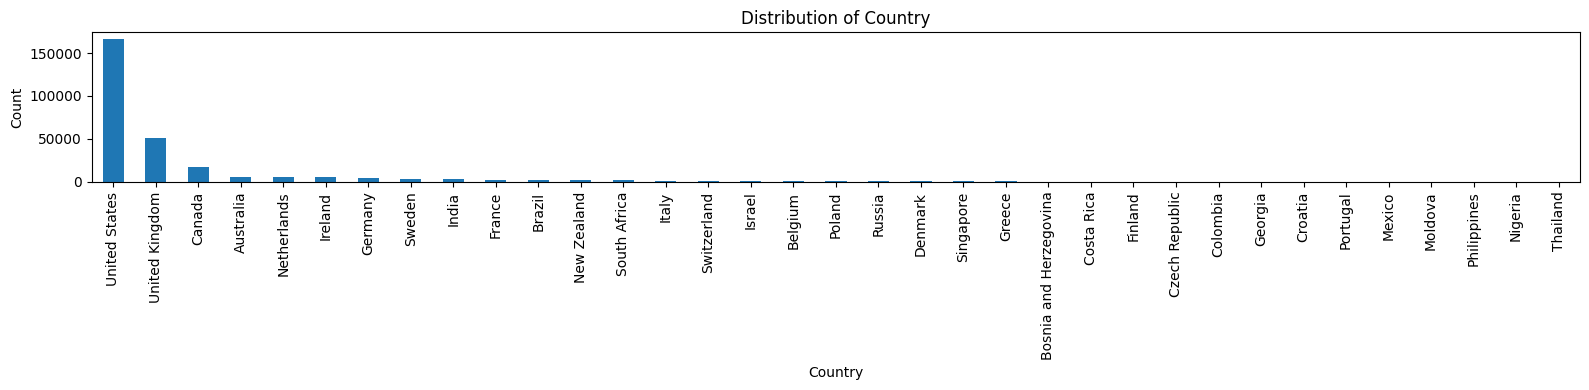


=== Occupation ===


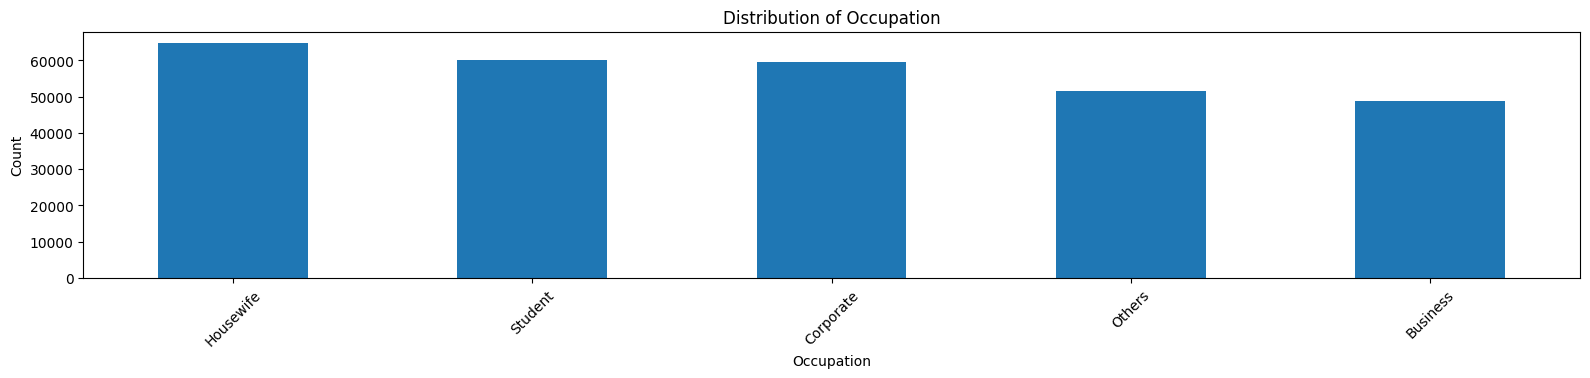


=== self_employed ===


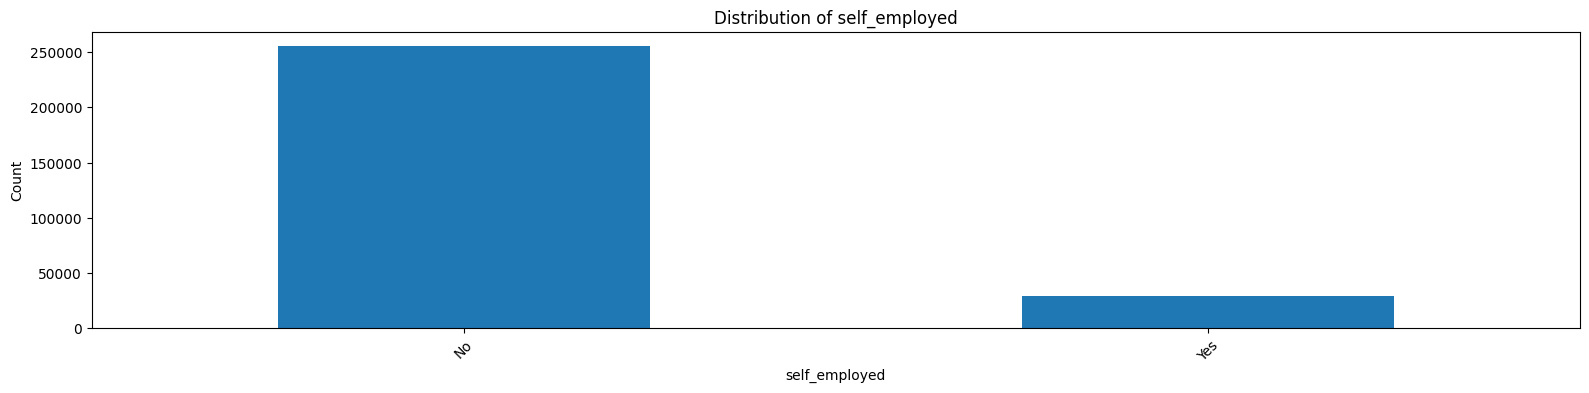


=== family_history ===


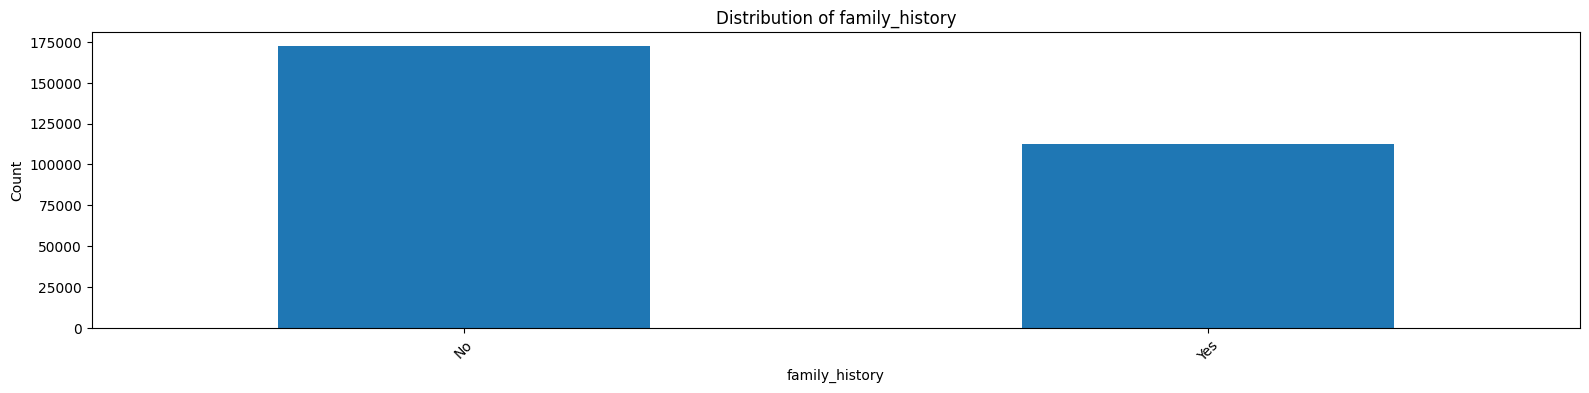


=== treatment ===


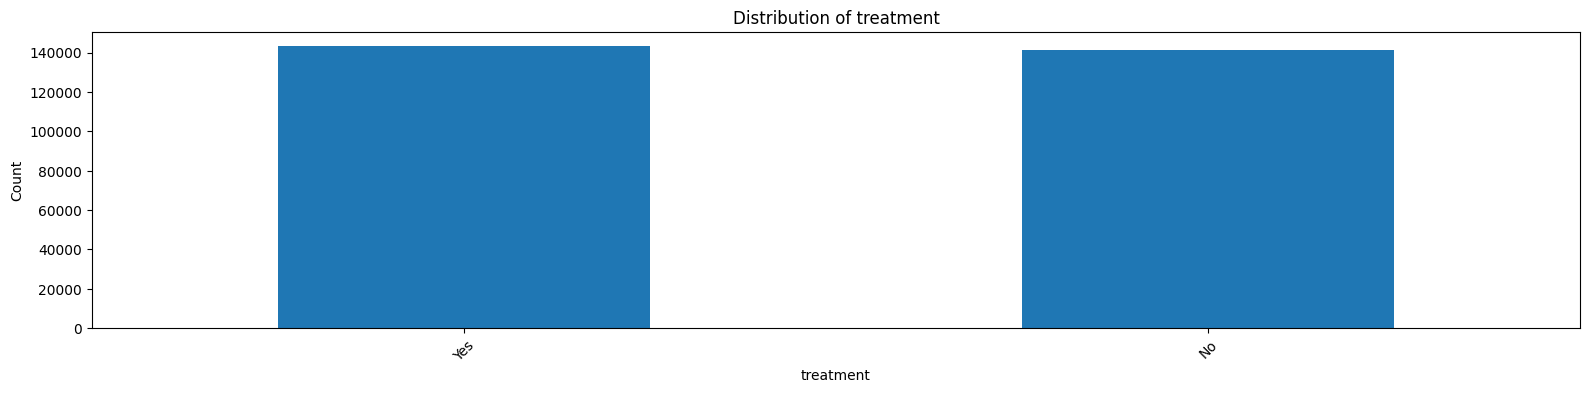


=== Days_Indoors ===


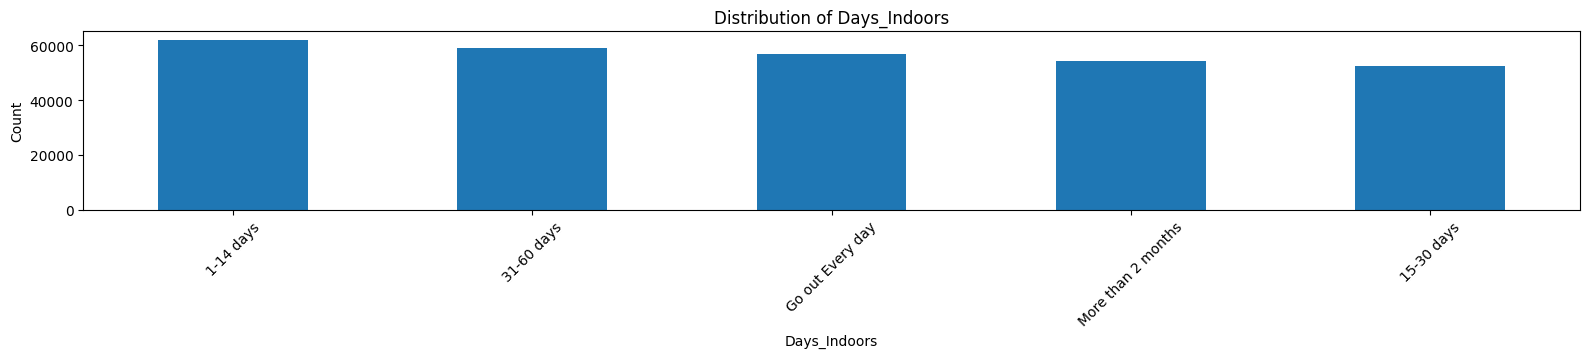


=== Growing_Stress ===


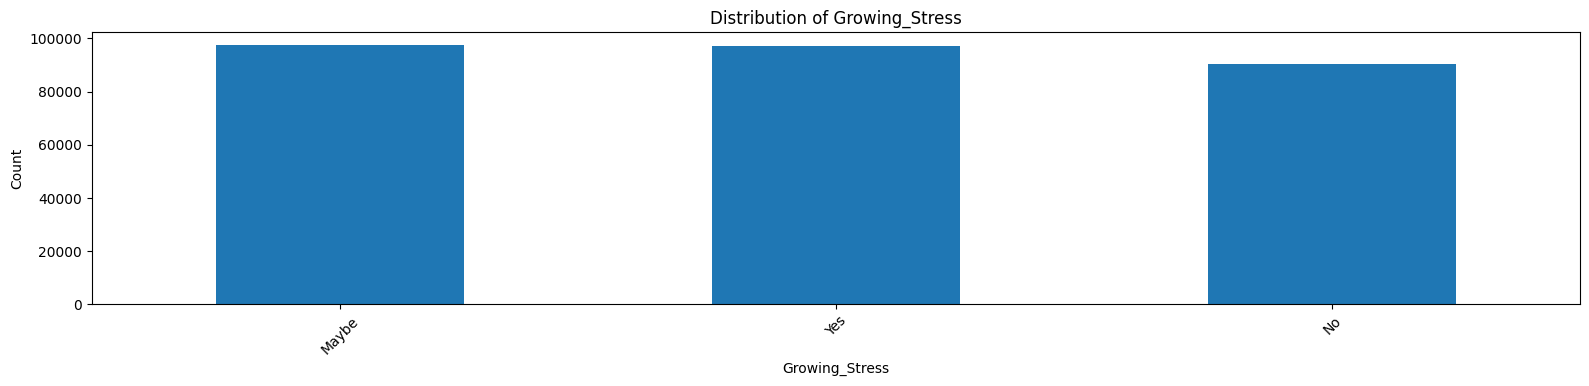


=== Changes_Habits ===


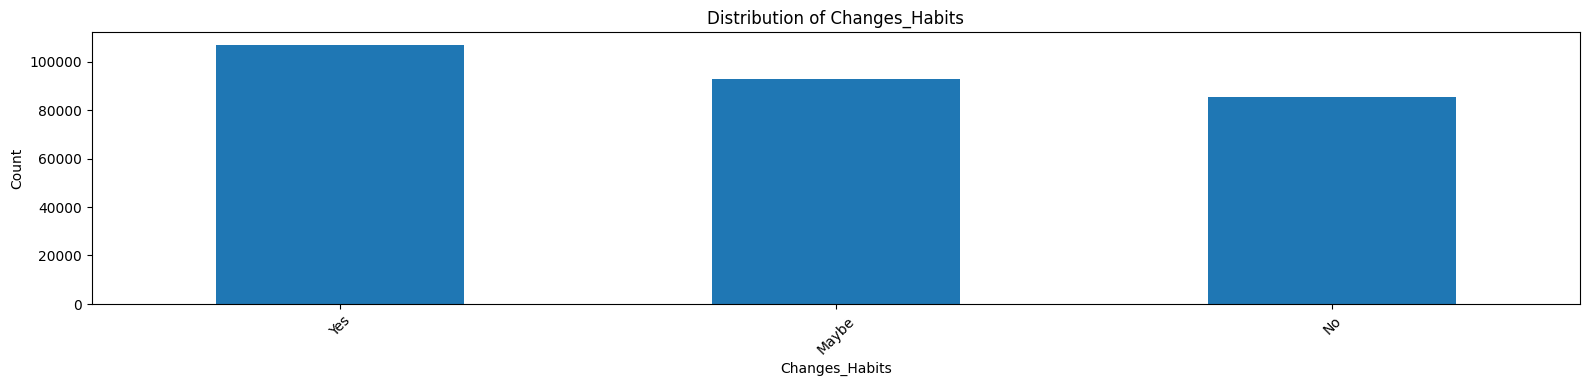


=== Mental_Health_History ===


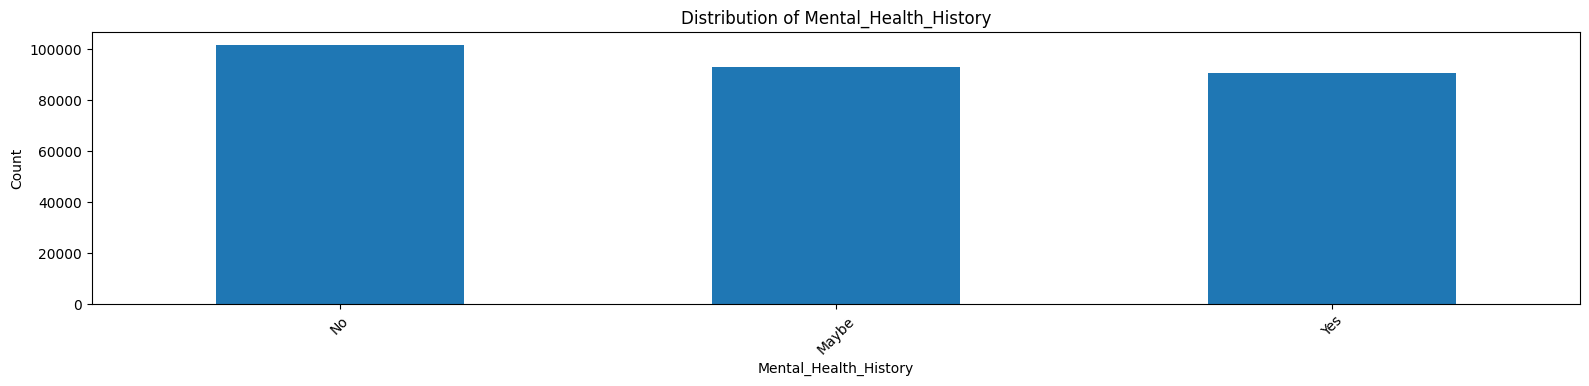


=== Mood_Swings ===


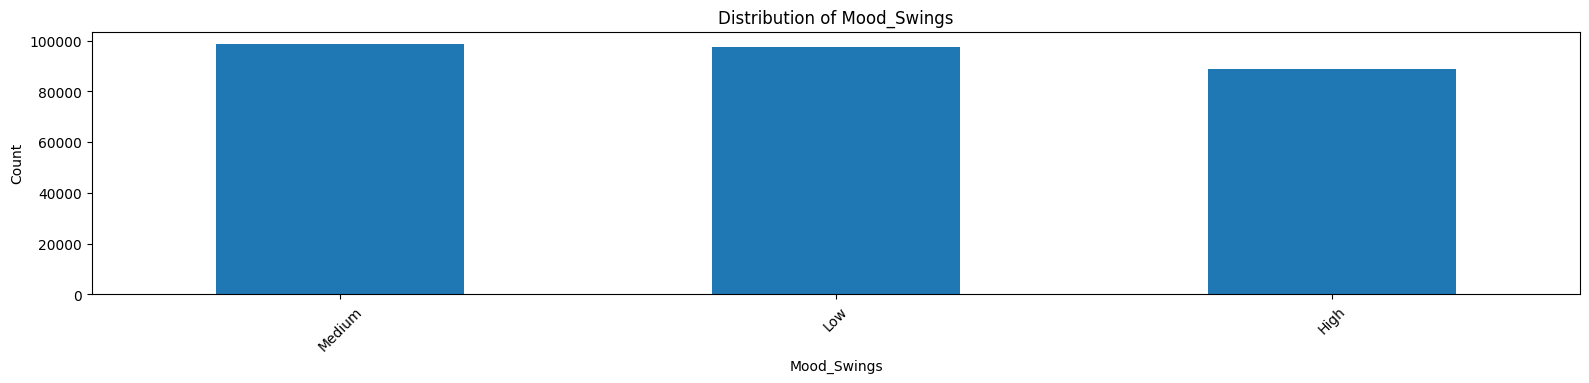


=== Coping_Struggles ===


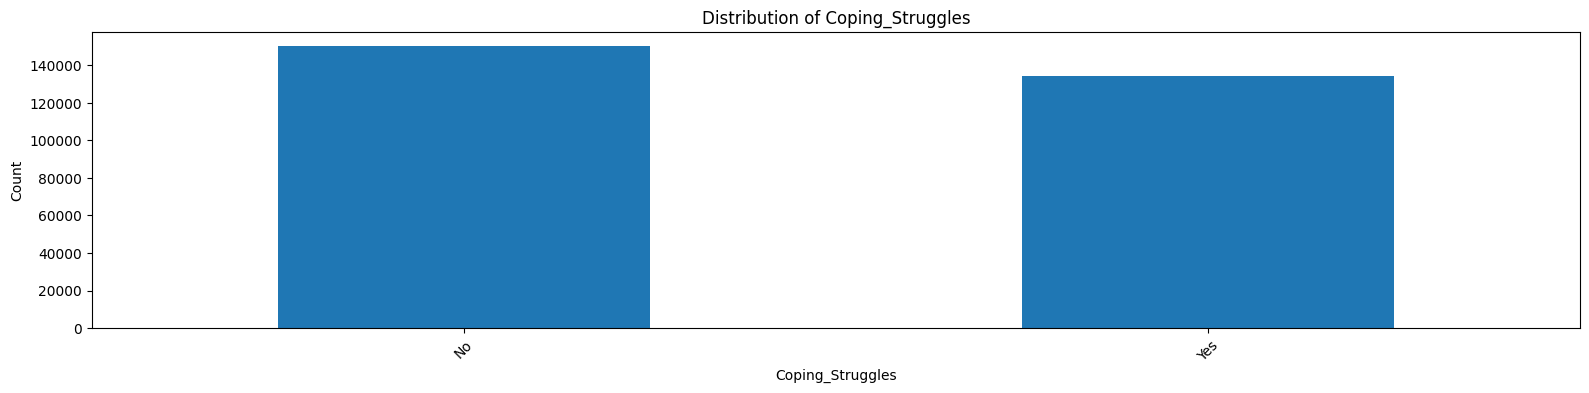


=== Work_Interest ===


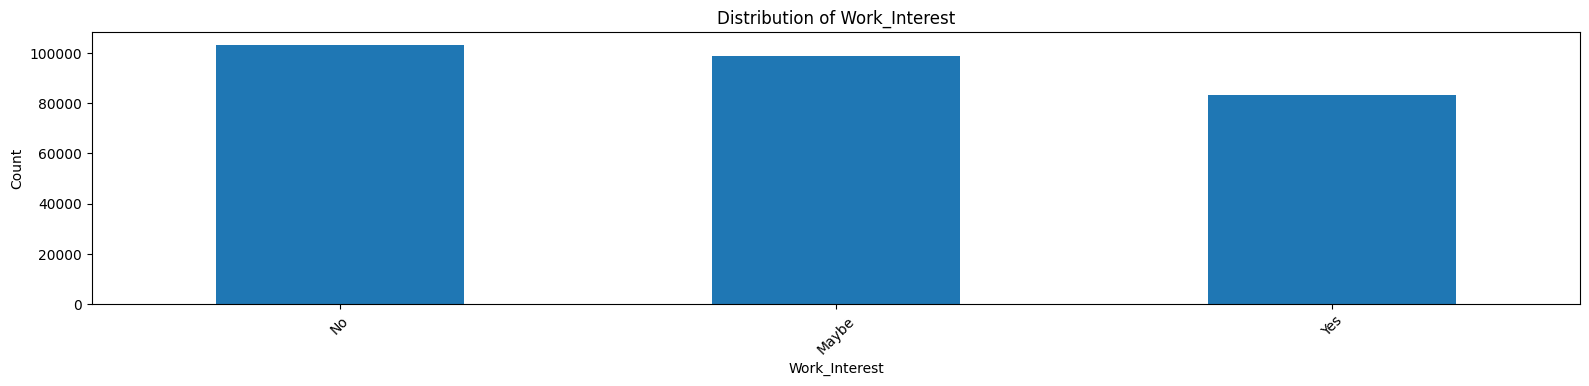


=== Social_Weakness ===


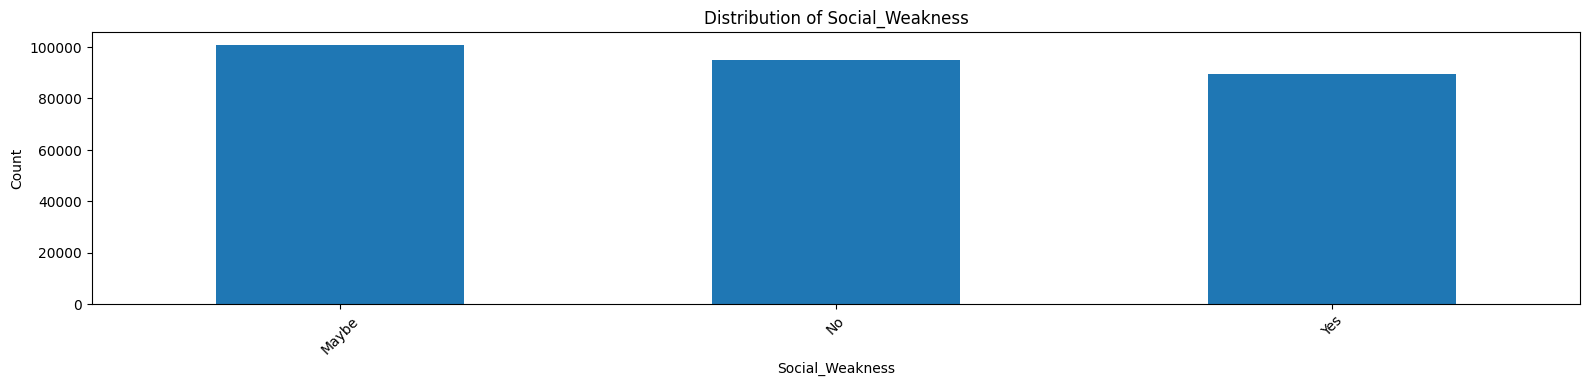


=== mental_health_interview ===


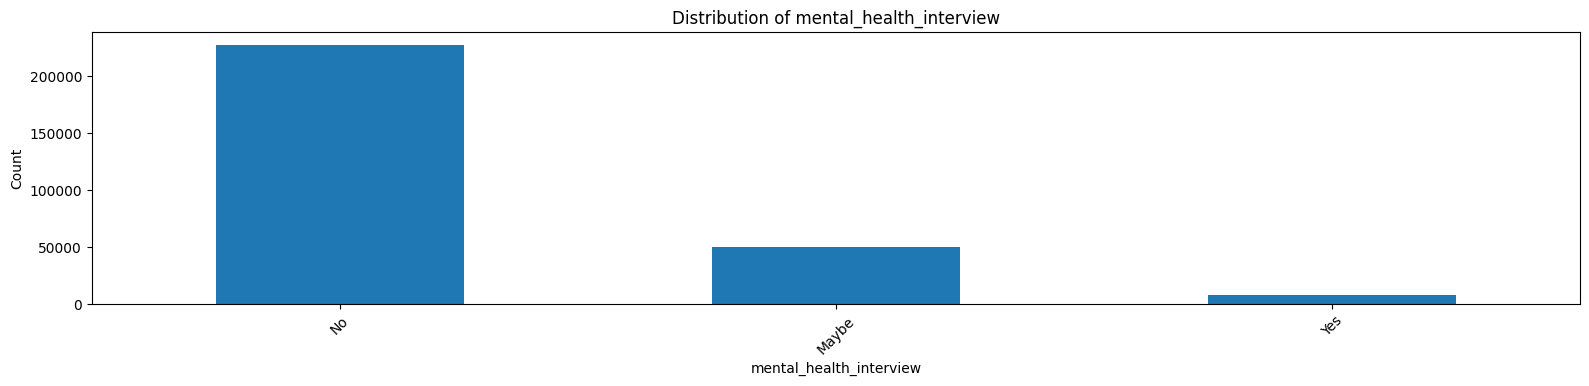


=== care_options ===


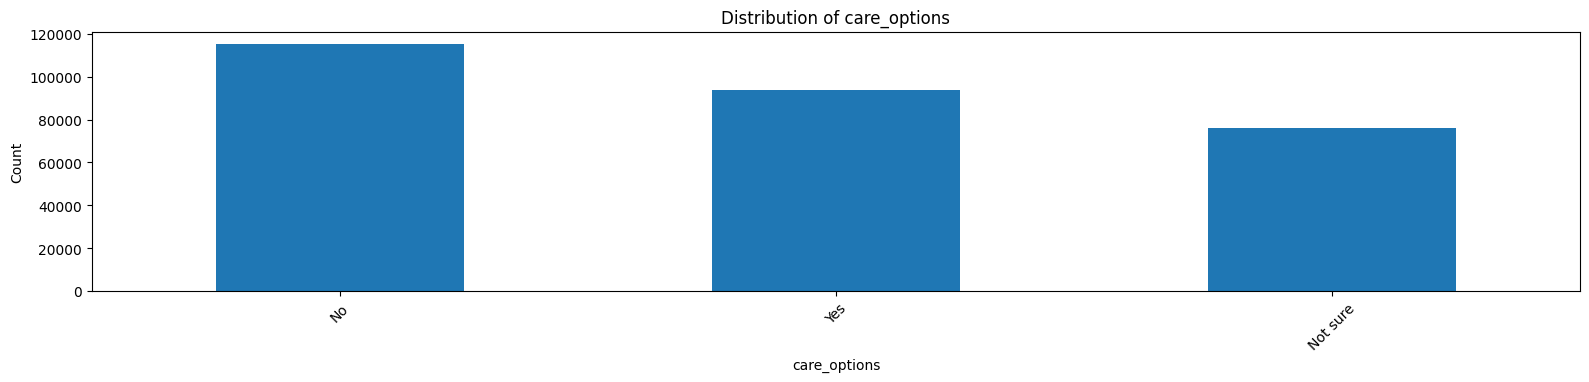

In [10]:
for col in cat_cols:
    print(f"\n=== {col} ===")
    plt.figure(figsize=(16, 4))
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    if col.lower() == "country":
        plt.xticks(rotation=90)
    else:
        plt.xticks(rotation=45)
    plt.show()

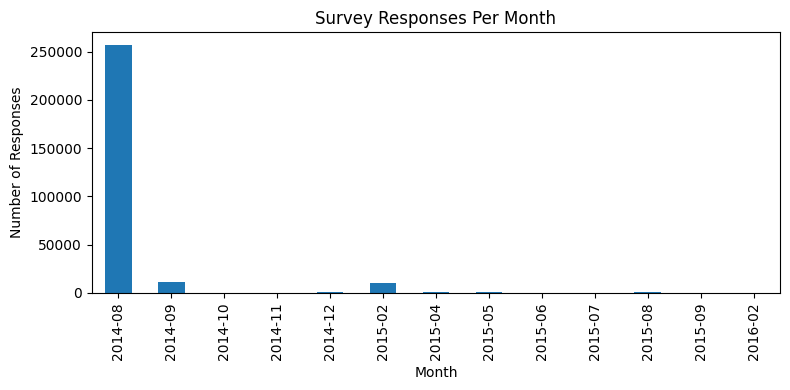

In [11]:
# Extract month (year and month)
df['Month'] = df['Timestamp'].dt.to_period('M')

monthly_counts = df['Month'].value_counts().sort_index()

plt.figure(figsize=(8,4))
monthly_counts.plot(kind='bar')
plt.title('Survey Responses Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Responses')
plt.tight_layout()
plt.show()

# drop the 'Month' column
df.drop(columns=['Month'], inplace=True)

In [12]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, p, dof, expected = chi2_contingency(confusion_matrix, correction=False)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


cat_cols = [col for col in df.columns if str(df[col].dtype) == 'category']

# Initialize an empty DataFrame for the association matrix
assoc_matrix = pd.DataFrame(np.ones((len(cat_cols), len(cat_cols))),
                            index=cat_cols, columns=cat_cols)

for col1 in cat_cols:
    for col2 in cat_cols:
        if col1 == col2:
            assoc_matrix.loc[col1, col2] = 1.0
        else:
            assoc_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

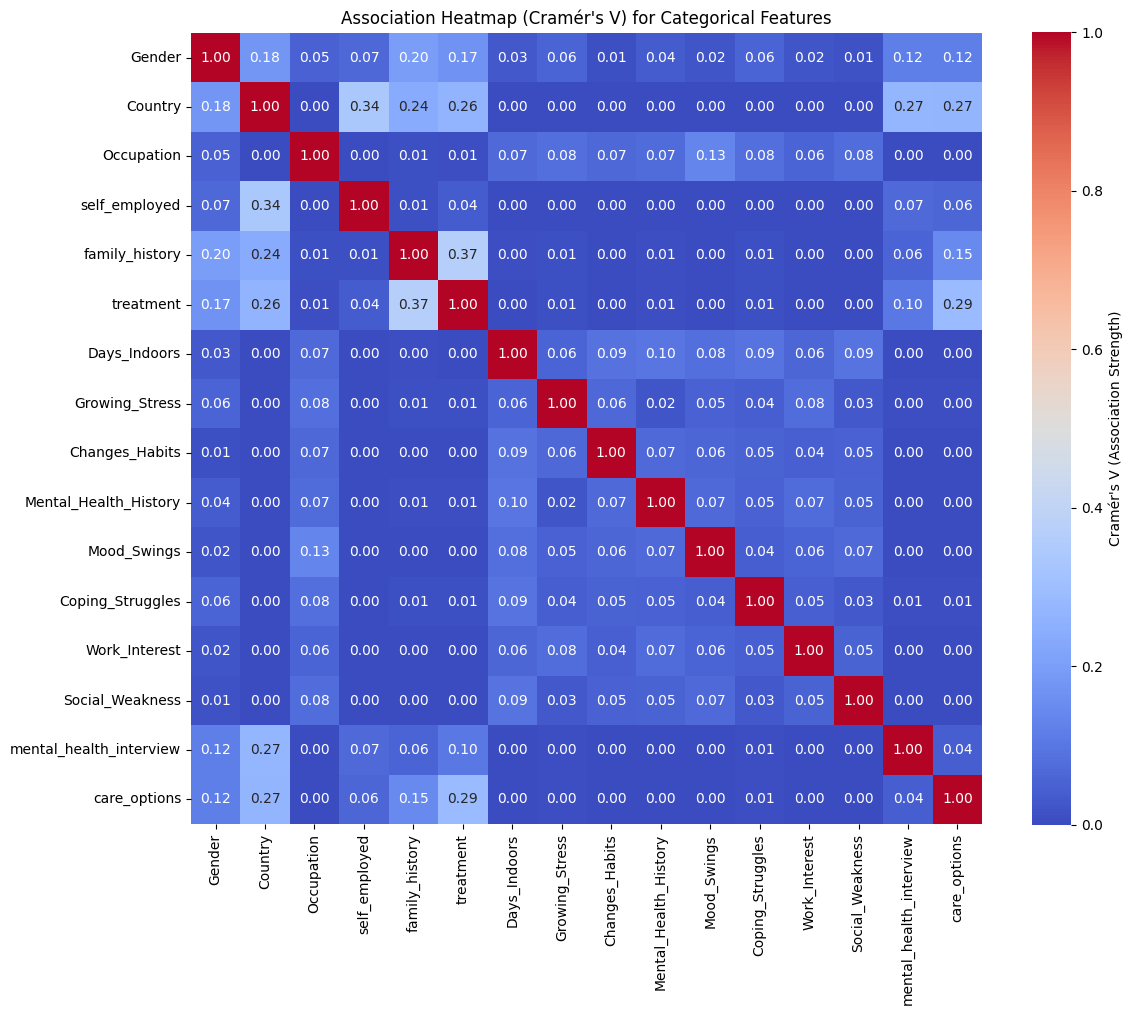

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(assoc_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={'label': "Cramér's V (Association Strength)"})
plt.title("Association Heatmap (Cramér's V) for Categorical Features")
plt.tight_layout()
plt.show()


Country vs. self_employed:
 self_employed               No   Yes
Country                             
Australia                 5234   780
Belgium                    821     0
Bosnia and Herzegovina     390     0
Brazil                    1560   780
Canada                   14676  2853
Colombia                   390     0
Costa Rica                 390     0
Croatia                      0   390
Czech Republic             390     0
Denmark                      0   780
Finland                    390     0
France                    1950   390
Georgia                    390     0
Germany                   3510  1170
Greece                     780     0
India                     2381   390
Ireland                   3592  1950
Israel                    1560     0
Italy                     1560     0
Mexico                       0   390
Moldova                    390     0
Netherlands               4721  1170
New Zealand               1991     0
Nigeria                    390     0
Philippin

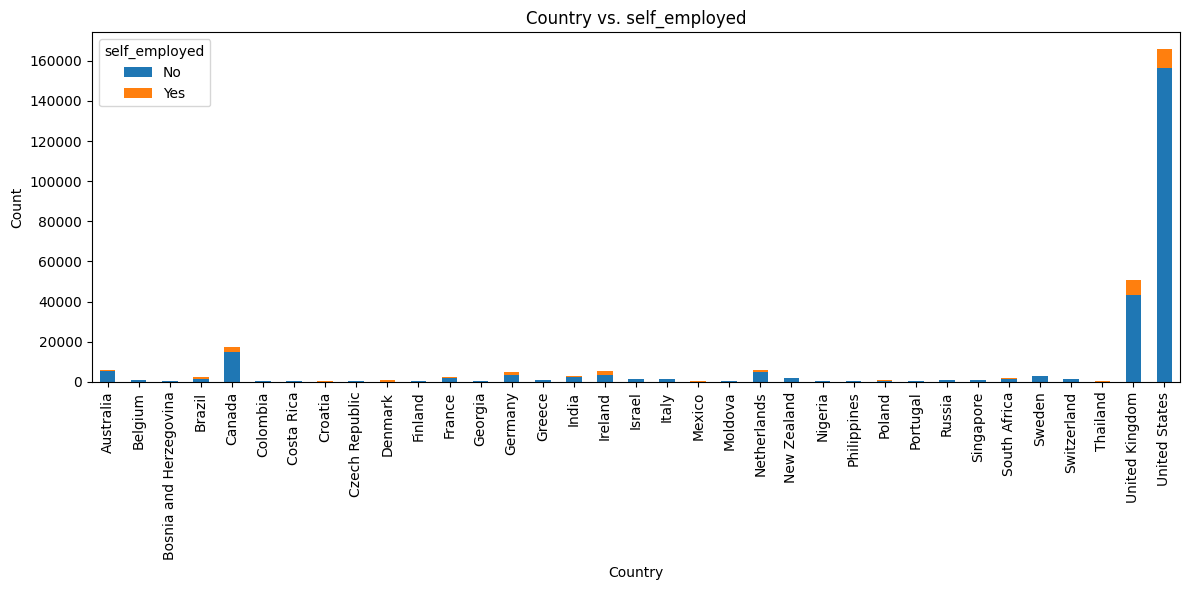


Occupation vs. self_employed:
 self_employed     No   Yes
Occupation                
Business       43947  4975
Corporate      53408  6206
Housewife      58093  6635
Others         46212  5218
Student        54051  6113


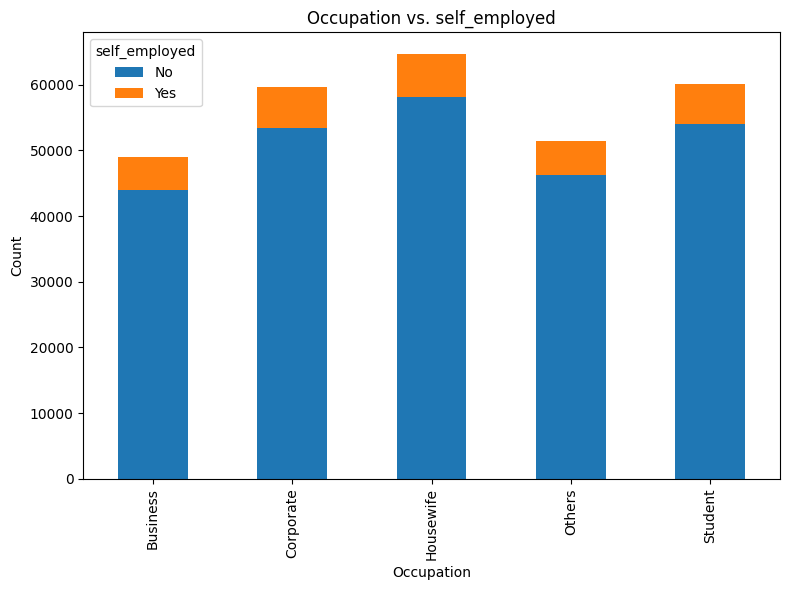


Country vs. Gender:
 Gender                  Female    Male
Country                               
Australia                 1724    4290
Belgium                    431     390
Bosnia and Herzegovina       0     390
Brazil                       0    2340
Canada                    3879   13650
Colombia                     0     390
Costa Rica                   0     390
Croatia                      0     390
Czech Republic               0     390
Denmark                      0     780
Finland                      0     390
France                       0    2340
Georgia                      0     390
Germany                      0    4680
Greece                       0     780
India                      431    2340
Ireland                    862    4680
Israel                       0    1560
Italy                        0    1560
Mexico                       0     390
Moldova                      0     390
Netherlands                431    5460
New Zealand                431    1560
Nig

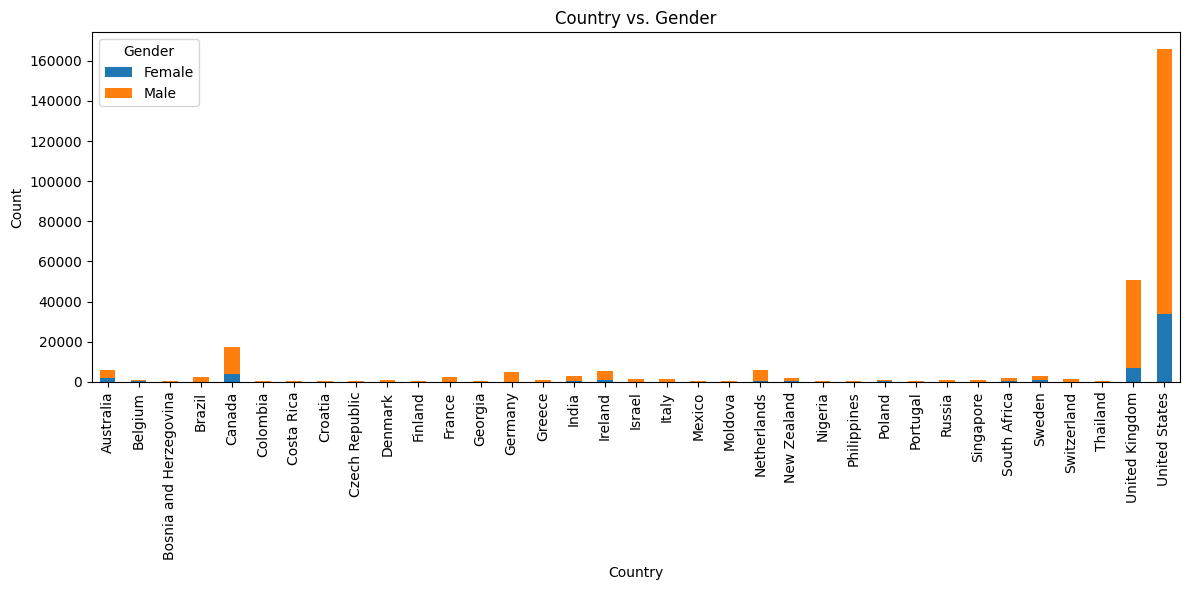


Country vs. family_history:
 family_history             No    Yes
Country                             
Australia                3120   2894
Belgium                   821      0
Bosnia and Herzegovina      0    390
Brazil                   1560    780
Canada                   9832   7697
Colombia                  390      0
Costa Rica                390      0
Croatia                   390      0
Czech Republic              0    390
Denmark                     0    780
Finland                   390      0
France                   1560    780
Georgia                   390      0
Germany                  3120   1560
Greece                    780      0
India                    2340    431
Ireland                  3161   2381
Israel                   1560      0
Italy                    1560      0
Mexico                    390      0
Moldova                   390      0
Netherlands              3551   2340
New Zealand              1170    821
Nigeria                   390      0
Philippi

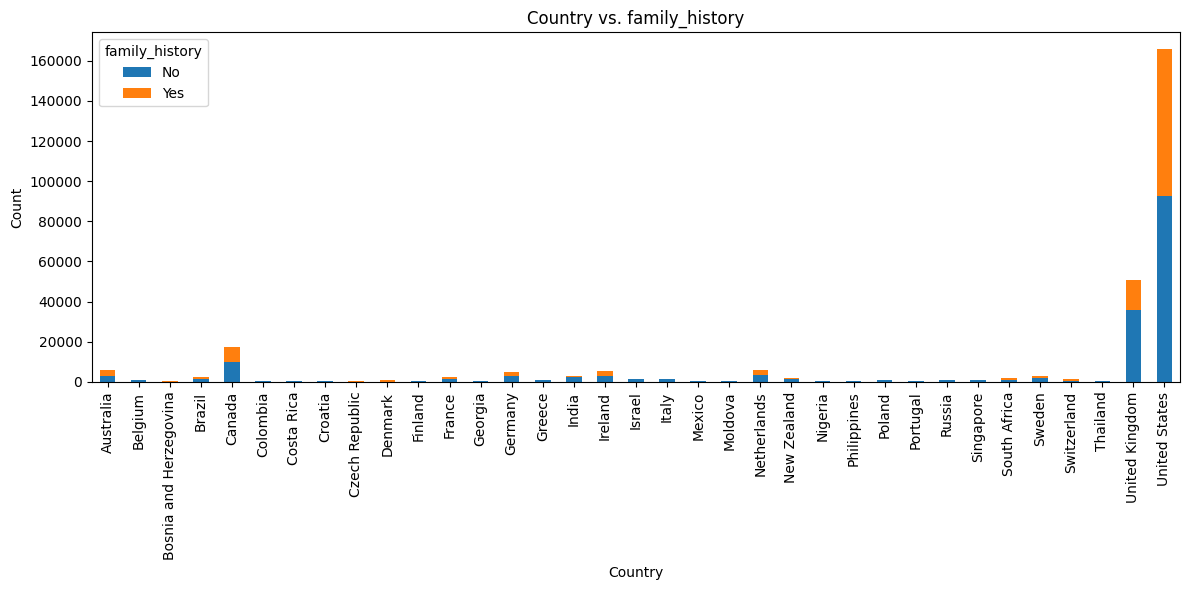

In [14]:
# 1. Country vs. self_employed
ctab1 = pd.crosstab(df['Country'], df['self_employed'])
print("\nCountry vs. self_employed:\n", ctab1)
ctab1.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Country vs. self_employed')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 2. Occupation vs. self_employed
ctab2 = pd.crosstab(df['Occupation'], df['self_employed'])
print("\nOccupation vs. self_employed:\n", ctab2)
ctab2.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Occupation vs. self_employed')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 3. Country vs. Gender (optional)
ctab3 = pd.crosstab(df['Country'], df['Gender'])
print("\nCountry vs. Gender:\n", ctab3)
ctab3.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Country vs. Gender')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 4. Country vs. family_history (optional)
ctab4 = pd.crosstab(df['Country'], df['family_history'])
print("\nCountry vs. family_history:\n", ctab4)
ctab4.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Country vs. family_history')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The dataset is heavily dominated by the United States and United Kingdom, with the U.S. showing a balanced family history split and the U.K. slightly skewed toward those without it. Meanwhile, over 20 countries contribute only 390 responses each, often entirely male, highlighting artificial sampling, gender imbalance, and low statistical utility, which can compromise fairness, generalizability, and model robustness in global mental health predictions.

**Filter out countries with small or gender-skewed sample sizes to reduce bias**

In [43]:
# Get countries with ≥1,000 total responses
country_counts = df['Country'].value_counts()
top_countries = country_counts[country_counts >= 1000].index

# Get countries with ≥200 female and male respondents
gender_counts = df.groupby(['Country', 'Gender'], observed=False).size().unstack(fill_value=0)
balanced_countries = gender_counts[(gender_counts['Female'] >= 200) & (gender_counts['Male'] >= 200)].index

# Intersect both criteria
best_countries = sorted(set(top_countries) & set(balanced_countries))

# Filter the original DataFrame
df_filtered = df[df['Country'].isin(best_countries)].copy()

# Summary
print("\nOriginal shape:", df.shape)
print("Filtered shape:", df_filtered.shape)
print("\nFinal Selected Countries:")
for country in best_countries:
    print("-", country)
print(f"\nTotal Selected Countries: {len(best_countries)}")


Original shape: (284858, 17)
Filtered shape: (260986, 17)

Final Selected Countries:
- Australia
- Canada
- India
- Ireland
- Netherlands
- New Zealand
- South Africa
- Sweden
- United Kingdom
- United States

Total Selected Countries: 10


### Defining Risk

In [16]:
!pip install kmodes --quiet
from kmodes.kmodes import KModes

In [17]:
# Load filtered data
df_filtered = pd.read_csv("filtered_mental_health_data.csv")
df_filtered.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

In [18]:
# Define your filtered dataset and categorical features
cat_features = [
    'Gender', 'Country', 'Occupation', 'self_employed', 'family_history',
    'treatment', 'Days_Indoors', 'Growing_Stress', 'Changes_Habits',
    'Mental_Health_History', 'Mood_Swings', 'Coping_Struggles',
    'Work_Interest', 'Social_Weakness', 'mental_health_interview', 'care_options'
]

X = df_filtered[cat_features].astype(str)
km = KModes(n_clusters=3, init='Huang', n_init=5, verbose=1, random_state=42)
clusters = km.fit_predict(X)
df_filtered['risk_cluster'] = clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 73310, cost: 1813191.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 31906, cost: 1817808.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 66214, cost: 1799281.0
Run 3, iteration: 2/100, moves: 22402, cost: 1799281.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 39321, cost: 1826005.0
Run 4, iteration: 2/100, moves: 35452, cost: 1805630.0
Run 4, iteration: 3/100, moves: 16414, cost: 1805630.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 66049, cost: 1804320.0
Best run was number 3


In [19]:
# Cluster Centroid Profiles: Most Common Feature Values per Risk Group
cluster_modes = pd.DataFrame(km.cluster_centroids_, columns=cat_features)
cluster_modes

,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,Male,United States,Student,No,No,No,1-14 days,Maybe,Yes,Maybe,High,Yes,No,No,No,No
1,Male,United States,Others,No,Yes,Yes,31-60 days,Maybe,Yes,No,Medium,No,Maybe,Yes,No,Yes
2,Male,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Low,No,Maybe,Maybe,No,Yes


In [20]:
# Interpret cluster composition
for i in range(3):
    print(f"\n--- Cluster {i} ---")
    display(df_filtered[df_filtered['risk_cluster'] == i].mode().iloc[0])


--- Cluster 0 ---


,0
Timestamp,2014-08-27 12:31:00
Gender,Male
Country,United States
Occupation,Student
self_employed,No
family_history,No
treatment,No
Days_Indoors,1-14 days
Growing_Stress,Maybe
Changes_Habits,Yes



--- Cluster 1 ---


,0
Timestamp,2014-08-27 12:53:00
Gender,Male
Country,United States
Occupation,Others
self_employed,No
family_history,Yes
treatment,Yes
Days_Indoors,31-60 days
Growing_Stress,Maybe
Changes_Habits,Yes



--- Cluster 2 ---


,0
Timestamp,2014-08-27 12:31:00
Gender,Male
Country,United States
Occupation,Corporate
self_employed,No
family_history,No
treatment,Yes
Days_Indoors,1-14 days
Growing_Stress,Yes
Changes_Habits,No


In [21]:
print(df_filtered['risk_cluster'].value_counts())

risk_cluster
0    119410
1     78567
2     63009
Name: count, dtype: int64


In [22]:
# Assign interpretable labels
risk_labels = {
    0: 'Low',      # Largest cluster
    1: 'Medium',   # Middle-sized cluster
    2: 'High'      # Smallest cluster, likely highest risk
}

df_filtered['risk_label'] = df_filtered['risk_cluster'].map(risk_labels)

In [23]:
# Sample of Raw Records for Manual Inspection
pd.set_option('display.max_rows', 100)  # Show up to 100 rows in the output
df.sample(n=100, random_state=42)  # 100 random rows, same each time with the seed

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
227657,2014-08-29 07:12:00,Male,United States,Business,No,No,No,1-14 days,Yes,Maybe,Yes,High,No,Yes,Yes,No,Not sure
94904,2014-09-04 06:23:00,Male,United Kingdom,Corporate,No,No,No,15-30 days,Yes,Yes,Yes,Low,Yes,Yes,No,No,No
250201,2014-08-27 19:28:00,Male,United States,Student,No,No,Yes,31-60 days,Yes,Yes,Yes,Medium,No,No,No,No,Not sure
90823,2014-08-27 14:41:00,Male,United Kingdom,Others,No,No,No,31-60 days,Maybe,No,No,Medium,Yes,Maybe,Yes,No,No
215307,2014-08-28 17:27:00,Male,United States,Others,No,Yes,Yes,15-30 days,No,Yes,Yes,Low,Yes,Maybe,Yes,No,Yes
287457,2014-08-27 11:36:00,Male,United States,Student,No,No,Yes,31-60 days,Maybe,Yes,Maybe,High,Yes,Yes,Maybe,No,No
128784,2014-08-27 11:35:00,Male,France,Student,Yes,Yes,No,15-30 days,No,Yes,Maybe,Low,No,Maybe,Yes,Maybe,No
145247,2014-08-29 07:12:00,Male,United States,Student,No,No,No,1-14 days,Maybe,No,Maybe,Low,Yes,No,Maybe,No,Not sure
109351,2014-08-27 17:15:00,Male,United States,Corporate,No,No,No,1-14 days,Yes,Maybe,Maybe,Low,Yes,Yes,Maybe,No,No
29985,2014-08-29 11:23:00,Female,Canada,Student,No,Yes,Yes,Go out Every day,No,Yes,Yes,Low,No,No,Yes,No,Not sure


In [24]:
pd.reset_option('display.max_rows')

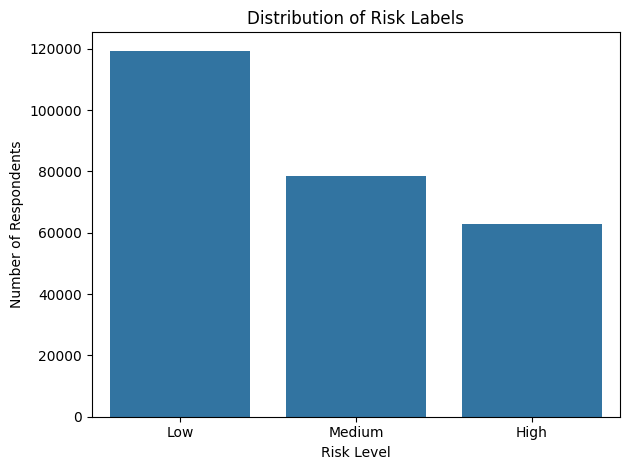

In [25]:
sns.countplot(x='risk_label', data=df_filtered, order=["Low", "Medium", "High"])
plt.title("Distribution of Risk Labels")
plt.xlabel("Risk Level")
plt.ylabel("Number of Respondents")
plt.tight_layout()
plt.show()

The chart reveals a **moderate class imbalance** favoring the Low-risk group, which is acceptable but may warrant applying class weights or sampling techniques during model training to ensure balanced learning.

In [26]:
# Drop the cluster column to prevent contamination of inferential statistics
df_filtered.drop(columns=['risk_cluster'], inplace=True)  # Drop the cluster column
df_filtered.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options,risk_label
0,2014-08-27 11:37:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes,High
1,2014-08-27 11:43:00,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes,High
2,2014-08-27 11:51:00,Female,Australia,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,High
3,2014-08-27 11:52:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No,High
4,2014-08-27 12:18:00,Female,United States,Corporate,No,No,No,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure,High


In [27]:
from scipy.stats import chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Chi-square for top features
X = df_filtered[cat_features].apply(LabelEncoder().fit_transform)
y = LabelEncoder().fit_transform(df_filtered['risk_label'])

chi_scores = chi2(X, y)
chi_df = pd.DataFrame({'Feature': cat_features, 'Chi2': chi_scores[0]})
chi_df.sort_values('Chi2', ascending=False)

,Feature,Chi2
4,family_history,29852.383233
15,care_options,26633.053897
5,treatment,25074.546324
7,Growing_Stress,14969.256182
10,Mood_Swings,9666.758733
11,Coping_Struggles,9495.722113
13,Social_Weakness,8751.265560
2,Occupation,7772.616848
9,Mental_Health_History,6620.166208
8,Changes_Habits,4918.670002


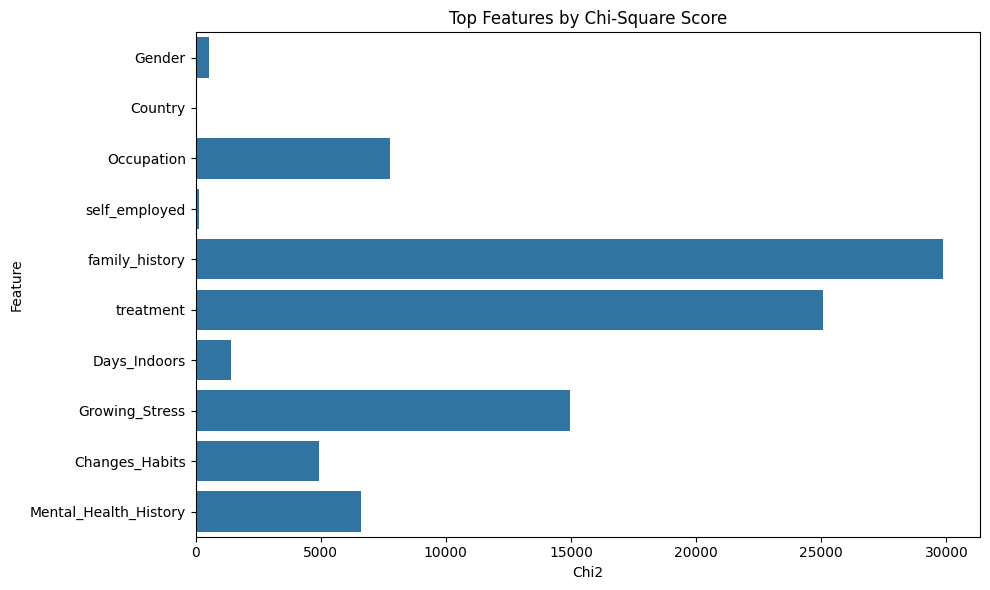

In [29]:
# Plot top features
plt.figure(figsize=(10, 6))
sns.barplot(data=chi_df.head(10), x='Chi2', y='Feature')
plt.title("Top Features by Chi-Square Score")
plt.tight_layout()
plt.show()

#### Chi-Squared test was used post-clustering to assess feature association with mental health risk labels.

**Top features** by Chi² score:

* family_history, care_options, treatment, Growing_Stress, Mood_Swings.

  *These align with known psychological and social risk factors.*

**Moderately associated features**:

* Coping_Struggles, Social_Weakness, Occupation.

**Low-impact features:**

* Gender, Country, self_employed, mental_health_interview.

  *These add minimal value and may introduce noise.*

In [30]:
# Filter out the too 3 countries to see if there are similiarities
top_countries = ['United States', 'United Kingdom', 'Canada']
country_groups = {country: df_filtered[df_filtered['Country'] == country] for country in top_countries}

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k - 1, r - 1))

categorical_cols = [
    'family_history', 'treatment', 'Coping_Struggles', 'Mood_Swings',
    'care_options', 'Social_Weakness', 'Changes_Habits',
    'Mental_Health_History', 'Work_Interest', 'Occupation',
    'Days_Indoors', 'self_employed', 'mental_health_interview'
]

top_features_by_country = {}

for country, group in country_groups.items():
    cramers_scores = {
        col: cramers_v(group[col], group['risk_label'])
        for col in categorical_cols if col in group.columns
    }
    sorted_scores = sorted(cramers_scores.items(), key=lambda item: item[1], reverse=True)
    top_features_by_country[country] = sorted_scores[:3]

for country, features in top_features_by_country.items():
    print(f"\nTop features for {country}:")
    for feature, score in features:
        print(f"  {feature}: {score:.3f}")


Top features for United States:
  treatment: 0.448
  family_history: 0.432
  Coping_Struggles: 0.267

Top features for United Kingdom:
  treatment: 0.429
  family_history: 0.414
  Coping_Struggles: 0.267

Top features for Canada:
  family_history: 0.463
  treatment: 0.435
  care_options: 0.280


Across the U.S., U.K., and Canada, treatment history and family history are the top predictors of mental health risk, with Cramér’s V values between 0.429 and 0.463. The third indicator varies, coping struggles in the U.S. and U.K., and care options in Canada, showing regional differences. **These patterns suggest that access to treatment, genetic background, and support systems are likely global drivers of mental health outcomes.**

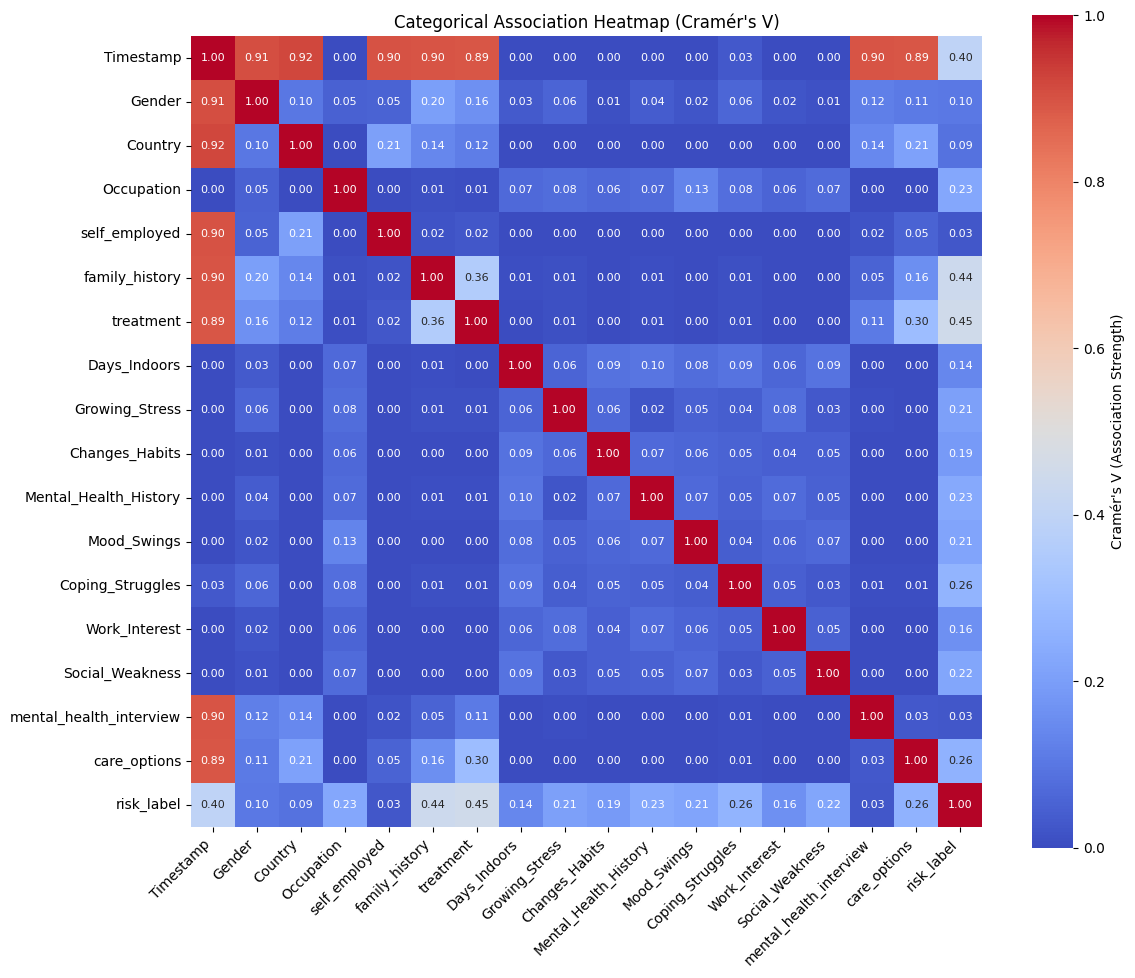

In [31]:
# Define the Cramér’s V function
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(confusion_matrix, correction=False)
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1)*(r - 1)) / (n - 1))
    rcorr = r - ((r - 1)**2) / (n - 1)
    kcorr = k - ((k - 1)**2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

# Filter to categorical columns
cat_cols = [col for col in df_filtered.columns if df_filtered[col].dtype.name == 'category' or df_filtered[col].dtype == object]

# Include 'risk_label' if present
if 'risk_label' in df_filtered.columns:
    df_filtered['risk_label'] = df_filtered['risk_label'].astype('category')
    if 'risk_label' not in cat_cols:
        cat_cols.append('risk_label')

# Initialize empty matrix
assoc_matrix = pd.DataFrame(np.eye(len(cat_cols)), index=cat_cols, columns=cat_cols)

# Fill upper triangle of the matrix
for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        if i < j:
            value = cramers_v(df_filtered[col1], df_filtered[col2])
            assoc_matrix.loc[col1, col2] = value
            assoc_matrix.loc[col2, col1] = value

# Convert all to float
assoc_matrix = assoc_matrix.astype(float)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    assoc_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
    annot_kws={"size": 8}, cbar_kws={'label': "Cramér's V (Association Strength)"}
)
plt.title("Categorical Association Heatmap (Cramér's V)")
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

**The Cramér’s V Heatmap** <br>
*The most actionable predictors of mental health risk are:*
* Treatment status
* Family history
* Coping struggles
* Access to care

### Bivariate Visualization

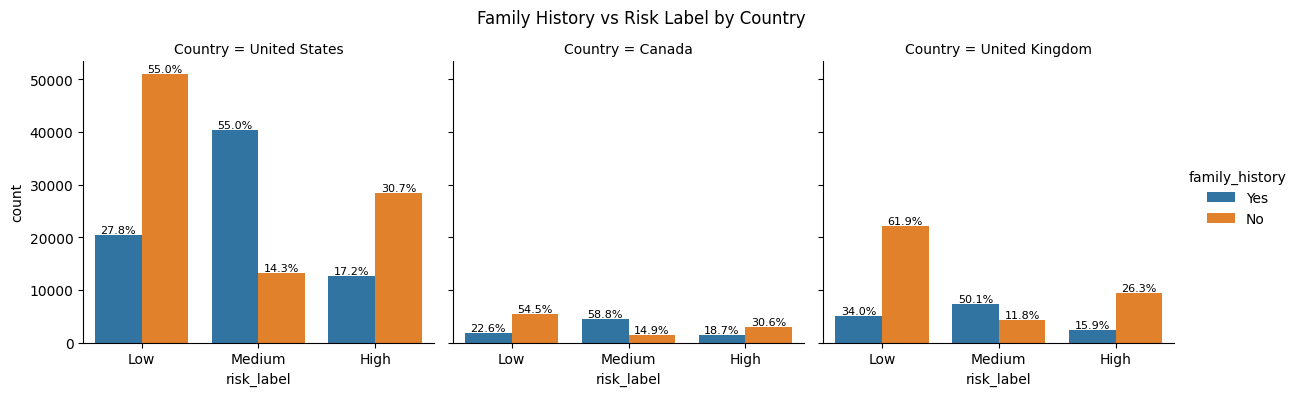

In [32]:
# Family_History vs Risk_Label by Country
top_countries = ['United States', 'United Kingdom', 'Canada']
df_top = df_filtered[df_filtered['Country'].isin(top_countries)]

g = sns.catplot(
    data=df_top,
    x='risk_label',
    hue='family_history',
    col='Country',
    kind='count',
    order=['Low', 'Medium', 'High'],
    col_wrap=3,
    height=4,
    aspect=1
)

for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f'{(v.get_height() / sum([b.get_height() for b in c.patches])) * 100:.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Family History vs Risk Label by Country")
plt.show()

Across all three countries, individuals with a family history of mental illness consistently show higher proportions in the Medium risk group, suggesting that family history may be a predictive indicator of moderate risk, rather than extreme low or high. However, cultural and healthcare system differences may influence how risk manifests regionally, especially in the Low and High categories.

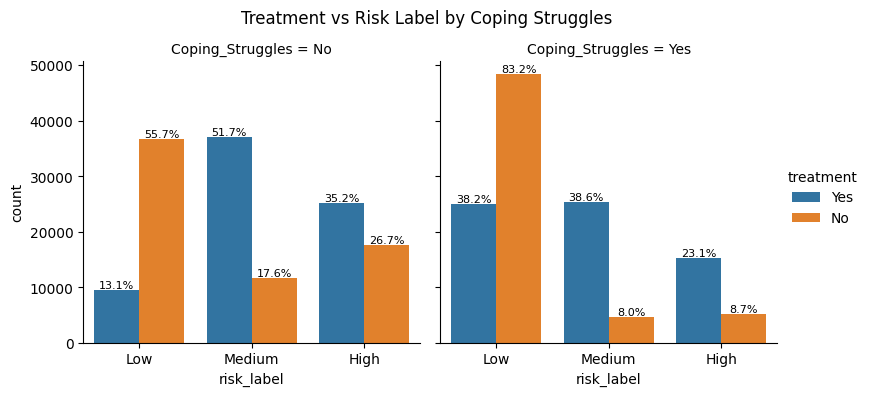

In [33]:
# Treatment vs Risk_Label by Coping_Struggles
g = sns.catplot(
    data=df_filtered,
    x='risk_label',
    hue='treatment',
    col='Coping_Struggles',
    kind='count',
    order=['Low', 'Medium', 'High'],
    height=4,
    aspect=1
)

for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f'{(v.get_height() / sum([b.get_height() for b in c.patches])) * 100:.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Treatment vs Risk Label by Coping Struggles")
plt.show()

Coping Struggles paired with treatment status reveals important behavioral patterns. Those receiving treatment are more likely to fall in the Medium to High risk range, supporting the idea that treatment is sought more often by those who recognize or experience more serious symptoms. However, untreated individuals with struggles being mostly categorized as Low risk raises concerns about underdiagnosis or denial, especially in populations reluctant to seek help.

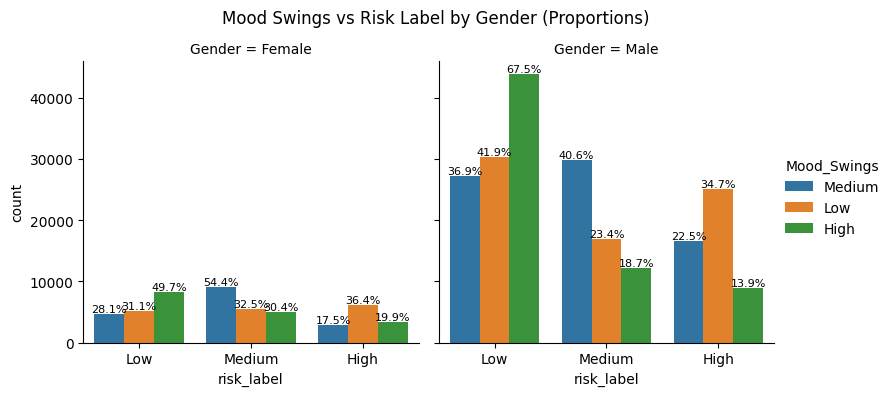

In [34]:
# Mood_Swings vs Risk_Label by Gender
g = sns.catplot(
    data=df_filtered,
    x='risk_label',
    hue='Mood_Swings',
    col='Gender',
    kind='count',
    order=['Low', 'Medium', 'High'],
    height=4,
    aspect=1
)

for ax in g.axes.flat:
    for c in ax.containers:
        labels = [f'{(v.get_height() / sum([b.get_height() for b in c.patches])) * 100:.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Mood Swings vs Risk Label by Gender (Proportions)")
plt.show()

The chart shows that **females exhibit a consistent pattern where increasing mood swings align with higher mental health risk**. In contrast, males with high mood swings are most commonly in the low-risk group, suggesting possible underreporting or differing emotional norms. This highlights the need for gender-sensitive interpretations in mental health assessments.

### Trivariate Visualizations

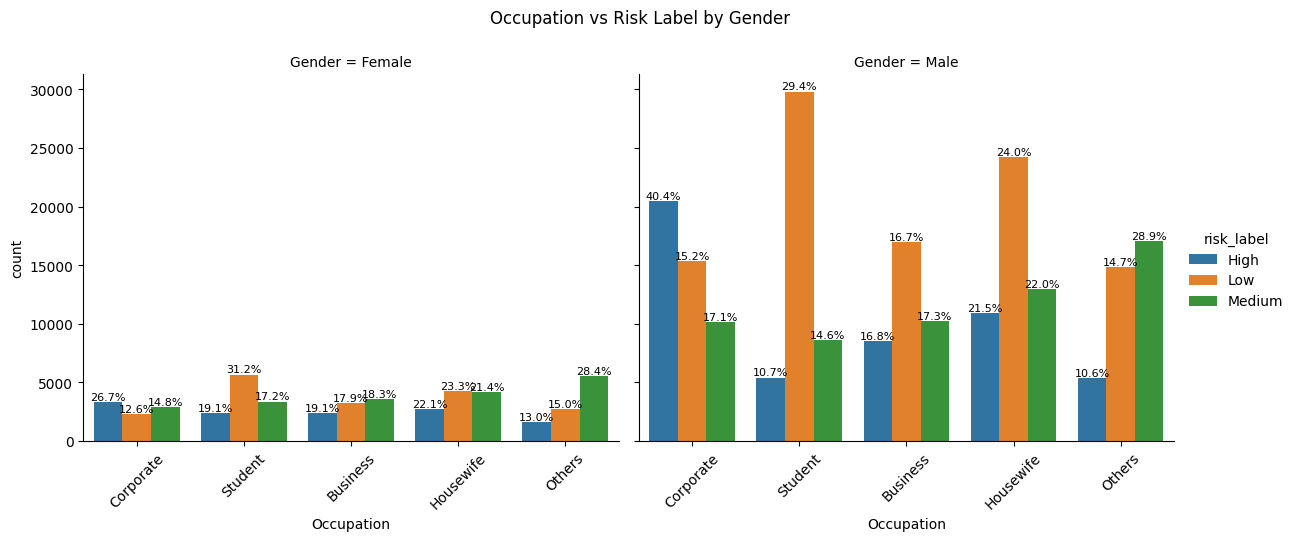

In [35]:
# Occupation vs Risk Label by Gender
g = sns.catplot(
    data=df_filtered,
    kind='count',
    x='Occupation',
    hue='risk_label',
    col='Gender',
    height=5,
    aspect=1.2
)

for ax in g.axes.flat:
    for c in ax.containers:
        total = sum([b.get_height() for b in c])
        labels = [f'{(v.get_height() / total) * 100:.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Occupation vs Risk Label by Gender')
g.set_xticklabels(rotation=45)
plt.show()

This chart reveals notable gender-based differences in mental health risk across occupations. **Among males, those in corporate roles show the highest percentage of high risk** (40.4%), while students and housewives are more concentrated in the low-risk category.

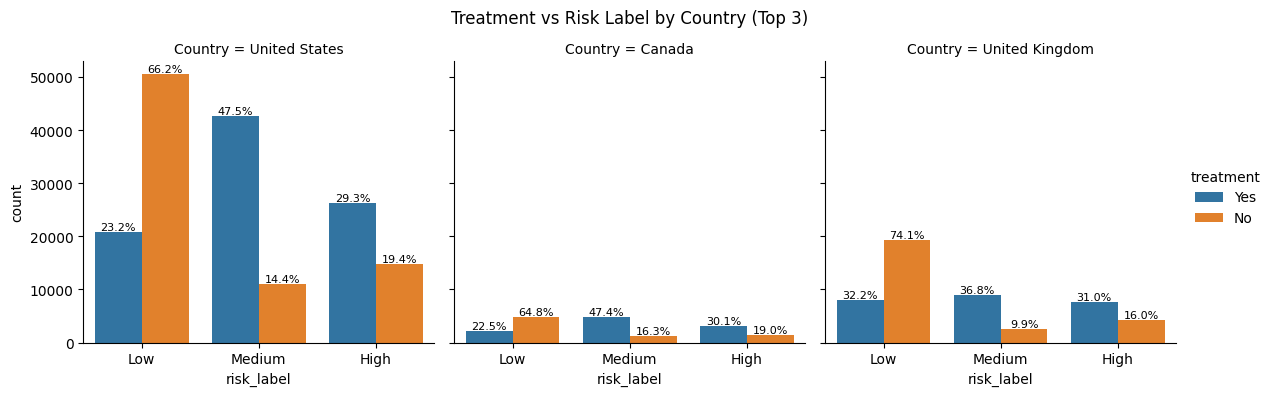

In [36]:
# Treatment vs Risk Label by Country
top_countries = ['United States', 'United Kingdom', 'Canada']
df_top = df_filtered[df_filtered['Country'].isin(top_countries)]

g = sns.catplot(
    data=df_top,
    x='risk_label',
    hue='treatment',
    col='Country',
    kind='count',
    order=['Low', 'Medium', 'High'],
    col_wrap=3,
    height=4,
    aspect=1
)

for ax in g.axes.flat:
    for c in ax.containers:
        total = sum([b.get_height() for b in c.patches])
        labels = [f'{(v.get_height()/total)*100:.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle("Treatment vs Risk Label by Country (Top 3)")
plt.show()

There is a clear ***global treatment gap*** because, in all three countries, **United States, Canada, and United Kingdom**, a majority of individuals labeled as low risk have not received treatment, even though they may still experience symptoms. This shows that treatment is not consistently aligned with need, meaning people who are either misclassified as low risk or simply not receiving care despite high risk.

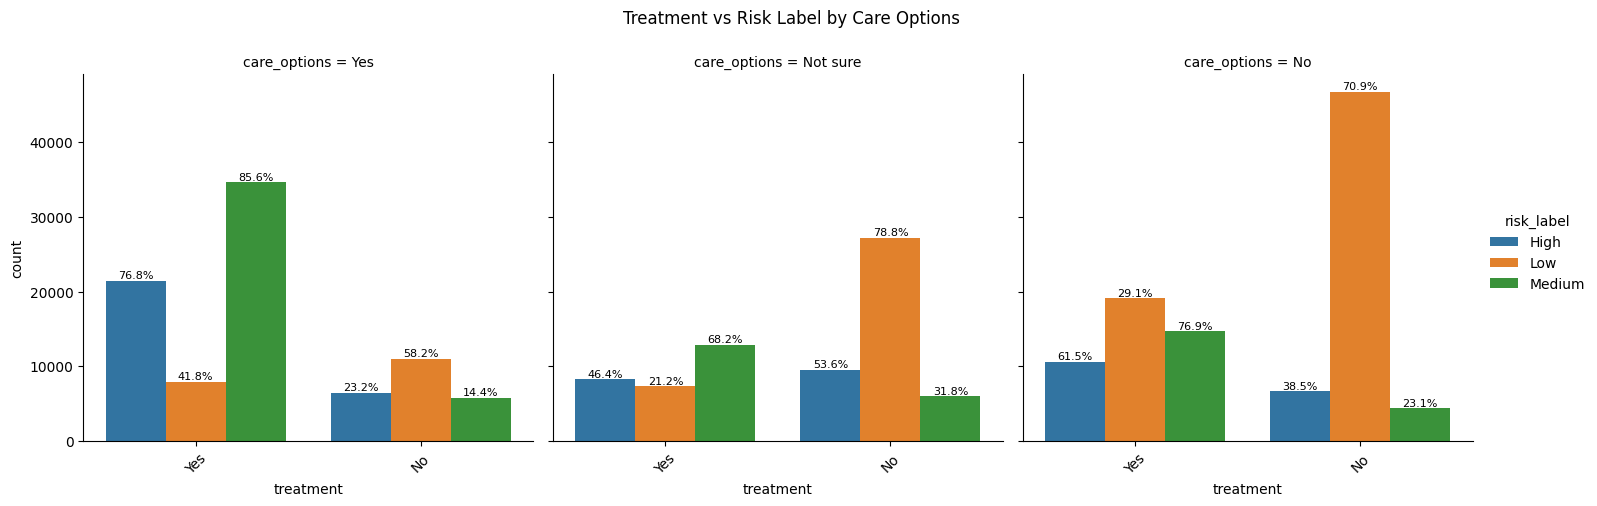

In [37]:
# Care_Options vs Treatment by Risk_Label
g = sns.catplot(
    data=df_filtered,
    kind='count',
    x='treatment',
    hue='risk_label',
    col='care_options',
    height=5,
    aspect=1
)

for ax in g.axes.flat:
    for c in ax.containers:
        total = sum([b.get_height() for b in c.patches])
        labels = [f'{(v.get_height() / total) * 100:.1f}%' if v.get_height() > 0 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', fontsize=8)

g.fig.subplots_adjust(top=0.85)
g.fig.suptitle('Treatment vs Risk Label by Care Options')
g.set_xticklabels(rotation=45)
plt.show()

Individuals who are aware of care options are significantly more likely to receive treatment, especially those at high risk (76.8%).

In [46]:
# Save the cleaned and filtered dataset without target (for general use or EDA)
df_filtered.to_csv("aai-590-capstone-mental-health/data-assets/cleaned_mental_health_data.csv", index=False)
print("Cleaned data saved to '/aai-590-capstone-mental-health/data-assets/cleaned_mental_health_data.csv'")

# Save the dataset with the target label (for modeling use)
df_filtered.to_csv("aai-590-capstone-mental-health/data-assets/target_health_data.csv", index=False)
print("Modeling data with target saved to '/aai-590-capstone-mental-health/data-assets/target_health_data.csv'")

Cleaned data saved to '/aai-590-capstone-mental-health/data-assets/cleaned_mental_health_data.csv'
Modeling data with target saved to '/aai-590-capstone-mental-health/data-assets/target_health_data.csv'
